In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
class BanditArm():
    def __init__(self , p):
        self.p = p
        self.p_estimate = 0
        self.N = 0
    
    # randomly generating 1 with probability p
    def pull(self):
        return np.random.random() < self.p
    
    # updating the running mean
    # Xn = ((N - 1)Xn-1 + X)/N
    # where Xn-1 - previous mean , Xn - current mean , X - current data
    def update(self , x):
        self.N += 1
        self.p_estimate = ((self.N - 1)*self.p_estimate + x)/self.N

In [51]:
NUM_TRAILS = 10000
Bandit_probabilities = [0.2 , 0.35 , 0.6]
EPS = 0.1

Mean Estimate  0.17771084337349408
Mean Estimate  0.34405144694533774
Mean Estimate  0.6068184247087743
Total reward Earned  5844
Overall win rate  0.5844
Number of times optimal bandit Selected  9357
Number of times explored  978
Number of times exploited  9022


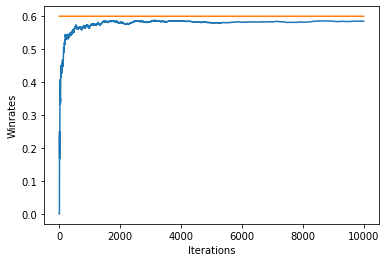

In [56]:
rewards = []
Num_explored = 0
Num_exploited = 0
num_optimal = 0

optimal_j = np.argmax(Bandit_probabilities)

bandits = [BanditArm(b) for b in Bandit_probabilities]

for i in range(NUM_TRAILS):
    
    if np.random.random() < EPS:
        j = np.random.randint(len(bandits))
        Num_explored +=1

    else:
        j = np.argmax([b.p_estimate for b in bandits])
        Num_exploited += 1
    
    if optimal_j == j:
        num_optimal += 1

    x = bandits[j].pull()
    rewards.append(x)
    bandits[j].update(x)

for b in bandits:
    print("Mean Estimate ", b.p_estimate)

print("Total reward Earned " , sum(rewards))
print("Overall win rate " , sum(rewards)/len(rewards))
print("Number of times optimal bandit Selected ", num_optimal)
print("Number of times explored " , Num_explored)
print("Number of times exploited " , Num_exploited)

#plot the results
cumsum = np.cumsum(rewards)
winrates = cumsum / (np.arange(NUM_TRAILS) + 1)
plt.plot(winrates)
plt.plot(np.ones(NUM_TRAILS)*np.max(Bandit_probabilities))
plt.xlabel("Iterations")
plt.ylabel("Winrates")
plt.show()

##Conclusion:
###The Mean Estimates of each bandits are close to their true mean
###From the graph, we can see that winrates converges to the maximum winrate after certain period.